# **Machine Learning Fundamentals - A look at the bits behind the brain.**

## Overview

This workshop will focus primarily on classification tasks and the different methods to maximize the results we aspire to achieve. We will focus on the reasoning behind the usability and the limitations of the different methods of machine learning to satisfy a given problem.

Later on in this workshop, we will look at putting the models to the test. We will be taking a dataset of breast cancer diagnoses and determining based on a number of attributes/features whether the patient had a malignant diagnosis or a benign diagnosis.

## Software Setup/Recommendations

This jupyter notebook was created and designed to work though **Google's Collaboratory** online tool. This online notebook editor program will contain all the necessary 3rd-party python packages you will need to run every cell in this notebook.

If you wish to run this in an offline enviroment: below is a list of 3rd party python packages that do not come standard with a clean installation of python by default:

In [30]:
# Tool to view images via python code.
# pip install --upgrade Pillow
from PIL import Image

# Dataset Visualization and Manipulation Library
# pip install --upgrade pandas
import pandas as pd

# TODO:  Quick description of what the libraries are and what they do.

# Multidimensional Array and Linear Algebra Computing Library
# pip install --upgrade numpy
import numpy as np

# seaborn & matplotlib - data visualization tools
# pip install --upgrade seaborn 
# pip install --upgrade matplotlib 
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn - data splitting tool for training and testing results.
# pip install --upgrade sklearn 
from sklearn.model_selection import train_test_split

# sklearn machine learning models
# pip install --upgrade sklearn 
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier

# sklearn - model performance metric tool
# pip install --upgrade sklearn 
from sklearn.metrics import classification_report

# Artificial Intelligence (AI) at its Core

At the core of AI lies the desire to find the ability to perform a task that a human being can trivially accomplish and do just as well if not better.

To get a grasp what that means, let's take a look at the following example:

## Example: Image Recognition


### What do you see in the following image?

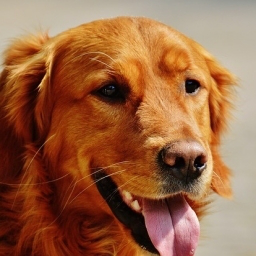

In [ ]:
display(Image.open(fp="img/animal.jpg", mode='r'))

### How about this one?

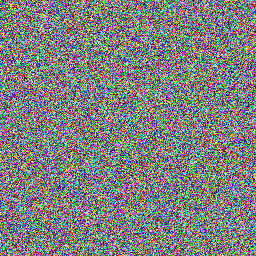

In [ ]:
Image.open(fp="img/random.png", mode='r')

### What is the main difference between the two images?




One is an image of something we can immediately recognize (a dog) and the other is just random noise.

### What is the 1 commonality between the two?



For randomly generating a single 256 RGB color space pixel, it will have a probability of:


$$
\frac{1}{256^3} \approx 5.96 * 10^{-8}
$$

Hence, for randomly generating either the picture of the dog or the noisy picture: they both have a probability of:

$$
\frac{1}{256^5} \approx 9.09 * 10^{-13}
$$

For reference, winning the 6/49 lottery game has the following probability of occuring:

$$
\binom{49}{6} = \frac{1}{13,983,816} \approx 1.40 * 10^{-7}
$$

That means that the chance of randomly generating 2 256x256 images and them being the exact same pixel for pixel is about drawing 2 winning lottery tickets in a row!

# Machine Learning's (ML) role

As one of my instructors has said many times:

> When a person says that AI will solve the problem, they are not eradicating  the issue. They are merely changing it.

As you might have heard before, Machine Learning is a subset of Artificial Intelligence and lays the groundwork to the actual development of algorithms and models to do classiciation problems. We want to find any underlying pattern that we humans have trivially exploited and see if we can computationally emulate if not exceed that level of ease onto a reproduceable form.

In a more practical sense, we build a mathmatical model based that learns from a training dataset. To see how well it performs, we see how well it does on a test set. 

While our initial goal is to get a good test set result, we always want to make sure that we try to make the model account for the entire domain to the best of our ability.

To help answer this, let us look at strictly the realm of supervised machine learning binary classification tasks.

As a quick reminder, in supervised machine learning you have a dataset consisting of a set of features and a label you are trying to predict.

## The Problem: Breat Cancer Diagnosis

Given numerical information of a patient's cell nuclei taken from a breast mass, determine whether or not the diagnosis is malignant or benign. 

Dataset can be retrieved from the following locations:
- https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
- https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

Below is a direct link to the csv file (which is stored in the accompanying github repository):

- https://raw.githubusercontent.com/aisutd/F20-Fundamentals-Workshop/master/data/data.csv


# Step 0: Data Analysis and Pre-Processing

With any dataset, we want to see if we can make it easier for our model to have an easier time "learning" from the dataset in either a pure or transformed state.

This can come in many forms such as:
- Binning (putting numbers into specific buckets based on certain threshholds. think of histograms and how they are represented)
- Normalization (transforming a range of possible values for an attribute that could be in the interval $(-\infty, +\infty)$ to the interval $[-1, 1]$ or $[0, 1]$
- Hueristical Assumptions (Examining and utilizing statistical information to make an educated guess on how to achieve the best possible result)

Let's go ahead and download the dataset and store it into a DataFrame object for easier data manipulation in the future.

In [ ]:
url: str = "https://raw.githubusercontent.com/aisutd/F20-Fundamentals-Workshop/master/data/data.csv"
df: pd.DataFrame = pd.read_csv(url)
df['diagnosis'] = np.where(df['diagnosis'].values == 'M', 1, 0)

Now that we have retrieved the data, let's see what the first $n=10$ data points look like..

In [ ]:
df.head(n=10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


For the more statisically inclined individuals out there, let's get a statistical summary of the information as well. Likewise, we can drop the id column since that does not provide any useful information in our classification task.

In [ ]:
df.drop(columns=['id'], inplace=True, errors='ignore')
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


There's about **569** patients in this particular dataset, but what's the discrepency between those that have a malignant and those who have a benign diagnosis?

Since I'm getting tired of looking at so many numbers, let's make a visual representation of the difference between the 2 possible classes.

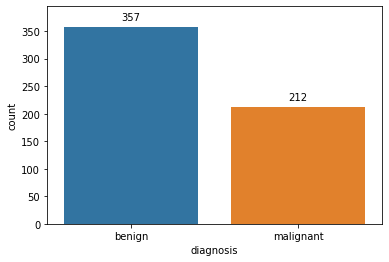

In [ ]:
order = [0, 1]
label_counts = df["diagnosis"].value_counts()

axes = sns.countplot(x='diagnosis', data=df, order=order)
axes.set_ylim([None, axes.get_ylim()[1] + 20])

plt.xticks(ticks=np.arange(2), labels=["benign", "malignant"])

for p in axes.patches:
    axes.annotate(
        s=p.get_height(),
        xy=(p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center',
        va = 'center',
        xytext = (0, 10),
        textcoords = 'offset points'
    )

Based on the graph, we can see that there are a lot more benign cases than there are malignant cases (phew!)

Now, let's compare how diagnosis compares to the features in a linear manner.

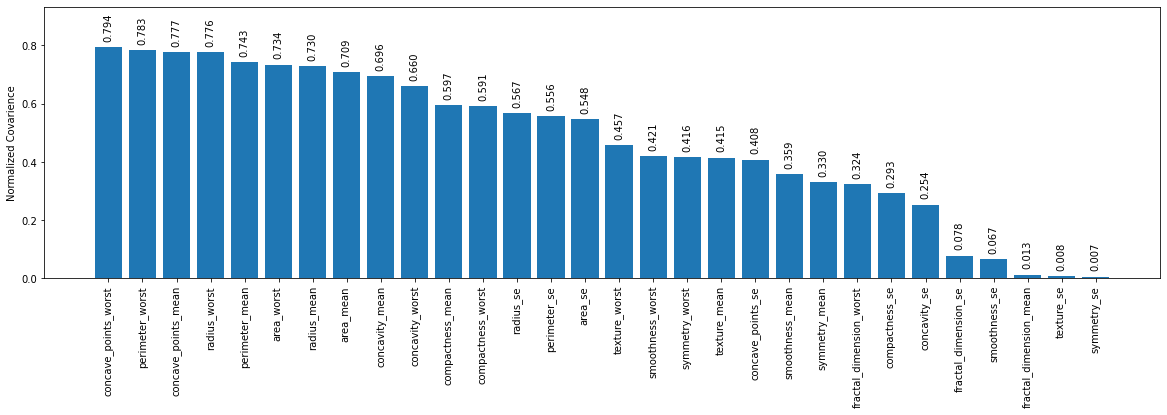

In [ ]:
# Let's get the absolute values of the normalized covarience
# (ie correlation coefficient) matrix
normalized_diagnosis_covariances = df.corr()["diagnosis"].drop(labels="diagnosis").abs()
normalized_diagnosis_covariances.sort_values(ascending=False, inplace=True)

# Setup how the bar chart will look
plt.subplots(figsize=(20, 5))
axes = plt.bar(normalized_diagnosis_covariances.index,normalized_diagnosis_covariances)
plt.xticks(rotation=90)
plt.ylim([None, plt.ylim()[1] + 0.1])
plt.ylabel("Normalized Covarience")

# Add/Annontate the numerical value above the bars
for p in axes.patches:
    plt.annotate(
        s=f"{p.get_height():.3f}",
        xy=(p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center',
        va = 'center',
        xytext = (0, 20),
        textcoords = 'offset points',
        rotation="90"
    )

plt.show()

Looking at the graph, our top 5 most strongly coorelated are:

- concave_points_worst
- perimeter_worst
- concave_points_mean
- radius_worst 
- perimeter_mean

For good measure, let us also consider `radius_mean` as a lot of the attributes deal with circular figures. Plus, the perimeter is just a scaled version of the radius.

**NOTE**: While correlation does not imply causation, it is still a heuristic. This hueristic gives us some idea of what features are more indicative of what things are important when considering a diagnosis.



#### Bonus: Comparing between all attributes

Below is how one would go about comparing every attributes to others

In [ ]:
"""
# Let's get the absolute values of the normalized covarience
# (ie correlation coefficient) matrix
normalized_covariance = df.corr(method='pearson')

# Let's only get the lower triangle values to only show unique pairs of
# relationships.
mask = np.triu(np.ones_like(absolute_normalized_covariance, dtype=bool))

# Now let's setup the shape and the data of the plot
plt.subplots(figsize=(30, 15))
ax = sns.heatmap(absolute_normalized_covariance, mask=mask, annot=True)

plt.show()
"""

"\n# Let's get the absolute values of the normalized covarience\n# (ie correlation coefficient) matrix\nnormalized_covariance = df.corr(method='pearson')\n\n# Let's only get the lower triangle values to only show unique pairs of\n# relationships.\nmask = np.triu(np.ones_like(absolute_normalized_covariance, dtype=bool))\n\n# Now let's setup the shape and the data of the plot\nplt.subplots(figsize=(30, 15))\nax = sns.heatmap(absolute_normalized_covariance, mask=mask, annot=True)\n\nplt.show()\n"

# Classification Approach 1: Linear Classifier

When working with multiple dimensions, a generalized linear equation will be our go-to way of representing mathematical classifier.


$$
f(x_{N \times 1})_{M \times 1} =  W^T_{M \times N}x + b_{M \times 1}
$$

where:

- $M$ is the number of distinct labels
- $N$ is the number of attributes (excluding the label column)
- $x_{N \times 1}$ is a single patient's features (AKA attributes)
- $W_{N \times M}$ is the weight matrix for the various attributes being apllied to
- $b_{M \times 1}$ is the bias for each attribute
- The function itself is the predicted values for the M different classes x can possible be labeled under.


For this equation, we end up with a $M \times 1$ matrix where each row will correspond to a particular probability for the given instance to be that particular class.

The subscripts correspond to the dimensions of the matricies for the variables.


When it comes to mapping it to a linear classifier, we normally rely upon a threshhold function. Let that function be:

$$
\hat{y} =
\begin{cases}
 1 & f(x) > T \\
 0 & \text{otherwise}
\end{cases}
$$

where $T \in \mathbb{R}$ is a threshhold value

For a visual example: https://www.desmos.com/calculator/gfjpijltao

## Implementation: Naive Bayes classifier for multivariate Bernoulli models

For our dataset to function using this classifier, we need to transform the data into a Bernoulli model.

In other words, we will need to perform a transformation on the data based on some hueristic to do the following for each attribute of each patient instance in our dataset:

0. Set it to 0 (ie the particular attribute for the particular patient instance does not meet the threshold)
1. Set it to 1 (ie the particular attribute for the particular patient instance does meet or exceed the threshold).

For the sake of simplicity, let us assume that the results follow a normal (also known as a gaussian) distribution. That means, for a particular feature, we set our threshhold point to be around the average of the maximum values of a malignant and benign instance. In other words:

$$
threshhold(feature f) = \frac{max(f | instance.diagnosis = benign) +  max(f | instance.diagnosis = malignant)}{2}
$$

In [ ]:
def calculate_threshhold(data: pd.DataFrame, attribute: str, num_bins: int = 10):
    malignant_counts, malignant_bins = np.histogram(
        data[data['diagnosis'] == 1][attribute],
        num_bins
    )
    benign_counts, benign_bins = np.histogram(
        data[data['diagnosis'] == 0][attribute]
    )
    malignant_max_point = malignant_bins[np.argmax(malignant_counts)+1]
    benign_max_point = benign_bins[np.argmax(benign_counts)+1]

    return (malignant_max_point + benign_max_point) / 2

linear_cf_df = df.copy(deep=True)

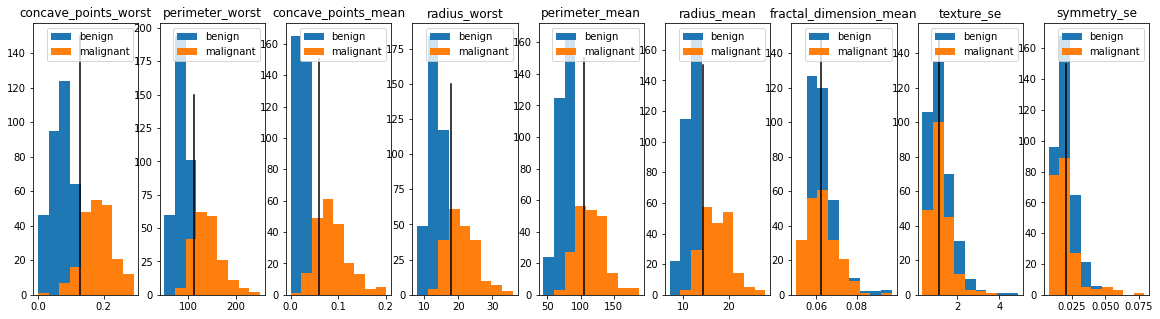

In [ ]:
attributes = [
    "concave_points_worst",
    "perimeter_worst",
    "concave_points_mean",
    "radius_worst",
    "perimeter_mean",
    "radius_mean",

    "fractal_dimension_mean",
    "texture_se",
    "symmetry_se",
]

for attribute, ax in zip(
    attributes, 
    plt.subplots(nrows=1, ncols=len(attributes), figsize=(20, 5))[1]
):
    bins = np.linspace(linear_cf_df[attribute].min(), linear_cf_df[attribute].max(), 10)
    threshold = calculate_threshhold(linear_cf_df, attribute)

    ax.hist(linear_cf_df[linear_cf_df['diagnosis'] == 0][attribute], bins=bins, label='benign')
    ax.hist(linear_cf_df[linear_cf_df['diagnosis'] == 1][attribute], bins=bins, label='malignant')
    ax.set_title(label=attribute)
    ax.plot([threshold, threshold], [0,150], color='black')
    ax.legend()

plt.show()

Let us go ahead and do the actual dataset transformation and train-test splitting operation to see how well our model performs.

In [ ]:
for col in linear_cf_df.columns:
    if col == 'diagnosis': continue

    threshold = calculate_threshhold(linear_cf_df, col)
    
    linear_cf_df.loc[(linear_cf_df[col] > threshold),col] = 1
    linear_cf_df.loc[(linear_cf_df[col] <= threshold),col] = 0

X_train, X_test, y_train, y_test = train_test_split(
    linear_cf_df.drop(columns='diagnosis'),
    linear_cf_df["diagnosis"],
    test_size=0.2,
    shuffle=True
)

Let's go ahead and train our model.

In [ ]:
clf = BernoulliNB()
clf.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

Finally, let's see how well our model performs!

In [ ]:
print(classification_report(y_test, clf.predict(X_test), labels=[0, 1], target_names=["benign", "malignant"]))

              precision    recall  f1-score   support

      benign       0.91      0.91      0.91        66
   malignant       0.88      0.88      0.88        48

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.89      0.89      0.89       114



Here we have a bunch of useful information shown to us.

For our purposes as of now, we only care about accuracy. 

That is not a bad number actually, but can we do better?

# Major Concept 1: The Bias Variance Tradeoff

In any task, our biggest enemy is a lack of knowledge. We can only do what we can with the small sample space that we have collected so far. 

This leads us to having 2 major balancing points for potential error: Bias and Varience.

Finally, there might just be noisy information and/or outliers that acts an an error we have by no means of removing no matter how hard we try besides inherently knowing that is only noise, but how are we supposed to even deduce that?

At the end of the day, the model should be designed to work with the domain and not the little bit that we have. It then becomes a balancing act.  


With Bias, we as the engineer make assumptions that may or may not be accurate to the true representation of the entire domain of data.

With Varience, our lack of information causes our pool of attainable knowledge to not necessarily have an easily definable commonality. To remedy this, we try to create a function that very closly matches what the sample looks like, but the model may only be really good at classifying the sample and not the whole. 

Finally, there might just be noisy information and/or outliers that acts an an error we have by no means of removing no matter how hard we try besides inherently knowing that is only noise.

Visually speaking:

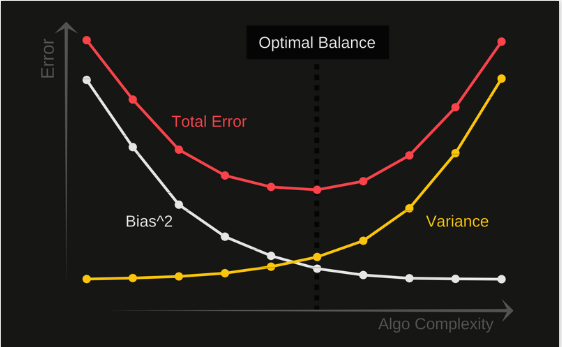

In [ ]:
display(Image.open(fp="img/bias-variance-tradeoff.png", mode='r'))

To get a more visual idea of what I have just said, let's take a more involved graphical example of this:

https://www.desmos.com/calculator/qktlp5dert

# Major Concept 2: The Non-Linearity Problem (XOR Problem)

Even with the best data analysis and preprocessing at our disposal, the data may not be linearly separable.

Let's take a basic example: the XOR operation. XOR(a, b) is defined as:

 a | b | XOR(a,b) 
---|---|----------
 0 | 0 |    0
 0 | 1 |    1
 1 | 0 |    1
 1 | 1 |    0

 **Note**: XOR works in a very similar manner to $\ne$ when considering boolean statements.

## Question: Can you draw a single line that cleanly separates the different outputes (ie 0 and 1) such that all 0's are on one side and all 1's are on the other side?

For an interactive attempt, go to the following link and try for yourself: https://www.desmos.com/geometry/jf95x727gi

### And the answer is.....


NO!

In fact, it is logically impossible to do so.

Let's go ahead and show why.

1. Assume for contradiction that all 4 possible cases can satisfy the question with a single line.
2. By $1$, the following are all true: 

    a. $0(w_a) + 0(w_b) \le T$ ie $0 \le T$

    b. $w_b > T$

    c. $w_a > T$

    d. $w_a + w_b \le T$
3. By $2a$: T must be a non-positive real number
4. By $2b$: w_b must be a positive real number
5. By $2c$: w_a must be a positive real number
6. By $4$ and $5$: $w_a + w_b$ must be a positive real number
7. However, $2d$ counters the conclusion made by $6$ because $2d$ states that $w_a + w_b$ is a non-positive real number.
8. Hence our initial assumption is wrong.
9. By Steps $1-8$: you cannot linearly separate the XOR function.


Let's try to use some other algorithms to perform the classification task that can also solve the XOR problem.

# Classification Approach 2: Transformation Models (Neural Networks)

If it currently is not linearly separable, let's transform the input so that it can be!

Let's go over some other binary logic gates/operations while we're at it:

 a | b | OR(a,b)     
---|---|----------    
 0 | 0 |    0
 0 | 1 |    1
 1 | 0 |    1
 1 | 1 |    1


 a | b | !AND(a,b)     
---|---|----------    
 0 | 0 |    1
 0 | 1 |    1
 1 | 0 |    1
 1 | 1 |    0


 a | b | AND(a,b)     
---|---|----------    
 0 | 0 |    0
 0 | 1 |    0
 1 | 0 |    0
 1 | 1 |    1



The big thing we want to take out of this is that the `AND` gate is linearly separable! The question is, how can we use the universal NAND Gate and maybe the OR gate to create an equation that is logically identical to XOR? 

## XOR == ???

### XOR == AND(OR(a,b), !AND(a,b))

Let's go ahead and try to represent the 3 gates into a more visual form.

## OR Gate Visualized

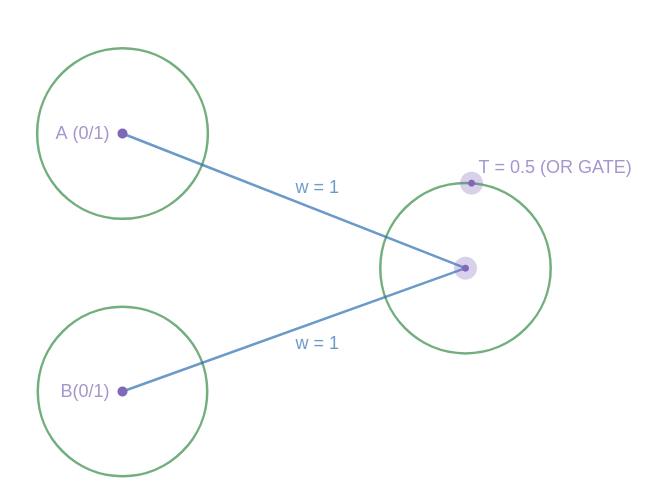

In [ ]:
display(Image.open(fp="img/or_gate.png", mode='r'))

## NAND Gate Visualized

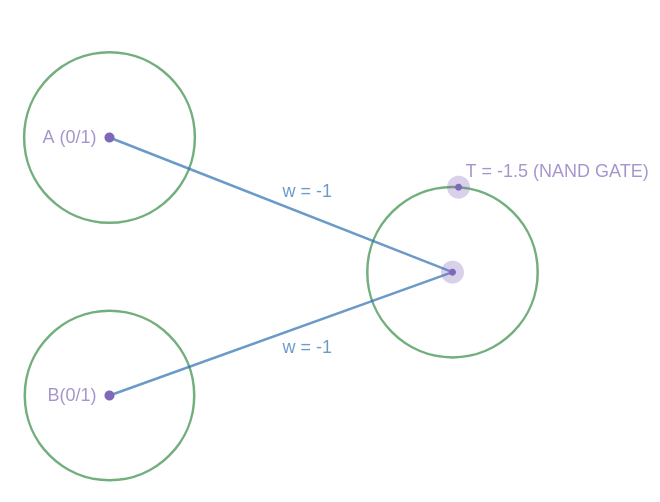

In [ ]:
display(Image.open(fp="img/nand_gate.png", mode='r'))

## AND Gate Visualized

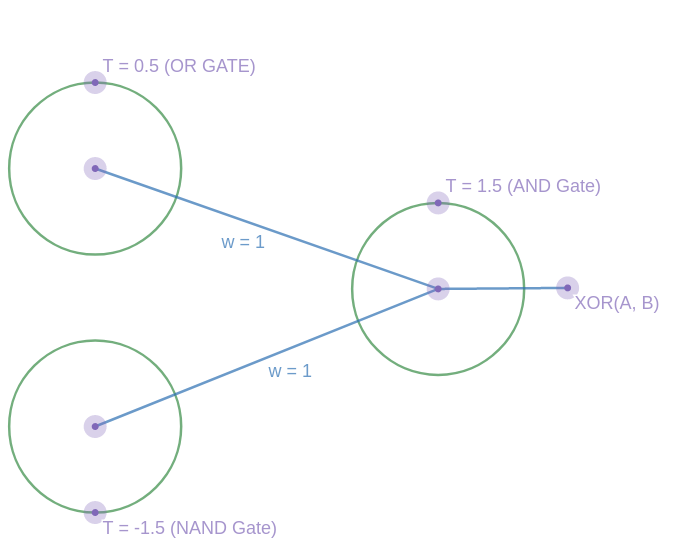

In [ ]:
display(Image.open(fp="img/and_gate.png", mode='r'))

## Complete XOR Nueral Network

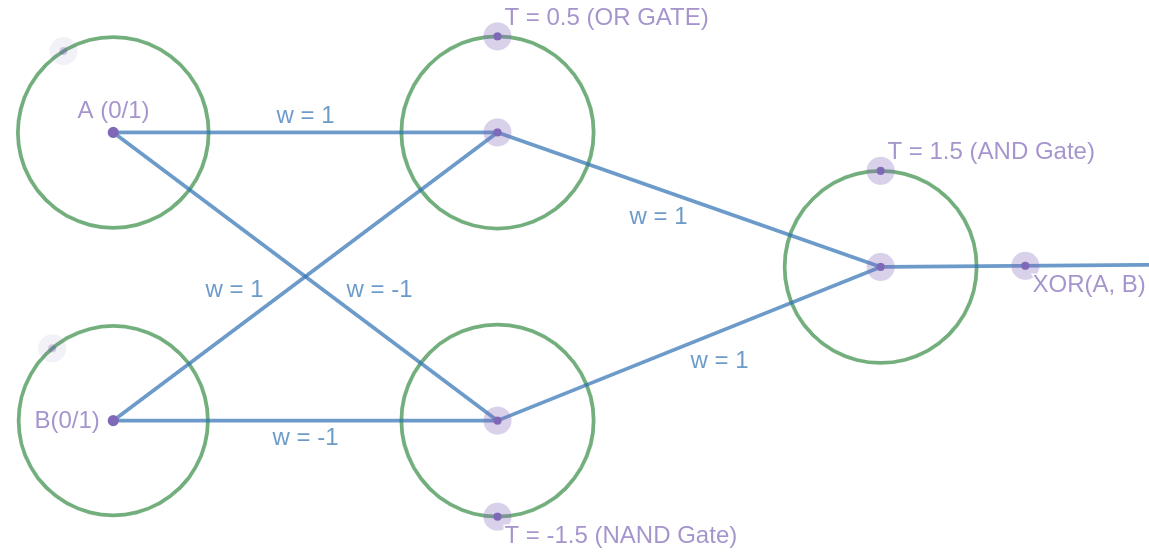

In [ ]:
display(Image.open(fp="img/XOR_NN.png", mode='r'))

## Implementation: Multi-Layer Perceptron

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns='diagnosis'),
    df["diagnosis"],
    test_size=0.2,
    shuffle=True
)

In [ ]:
clf = MLPClassifier(max_iter=500)
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
print(classification_report(y_test, clf.predict(X_test), labels=[0, 1], target_names=["benign", "malignant"]))

              precision    recall  f1-score   support

      benign       0.96      0.96      0.96        77
   malignant       0.92      0.92      0.92        37

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



# Classification Approach 3: Decision Boundary Models (Decision Tree)

If 1 line isn't enough, just add more!

Let's create our train-test split and train our model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns='diagnosis'),
    df["diagnosis"],
    test_size=0.2,
    shuffle=True
)

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5).fit(X_train, y_train)

Let's see what it looks like.

[]

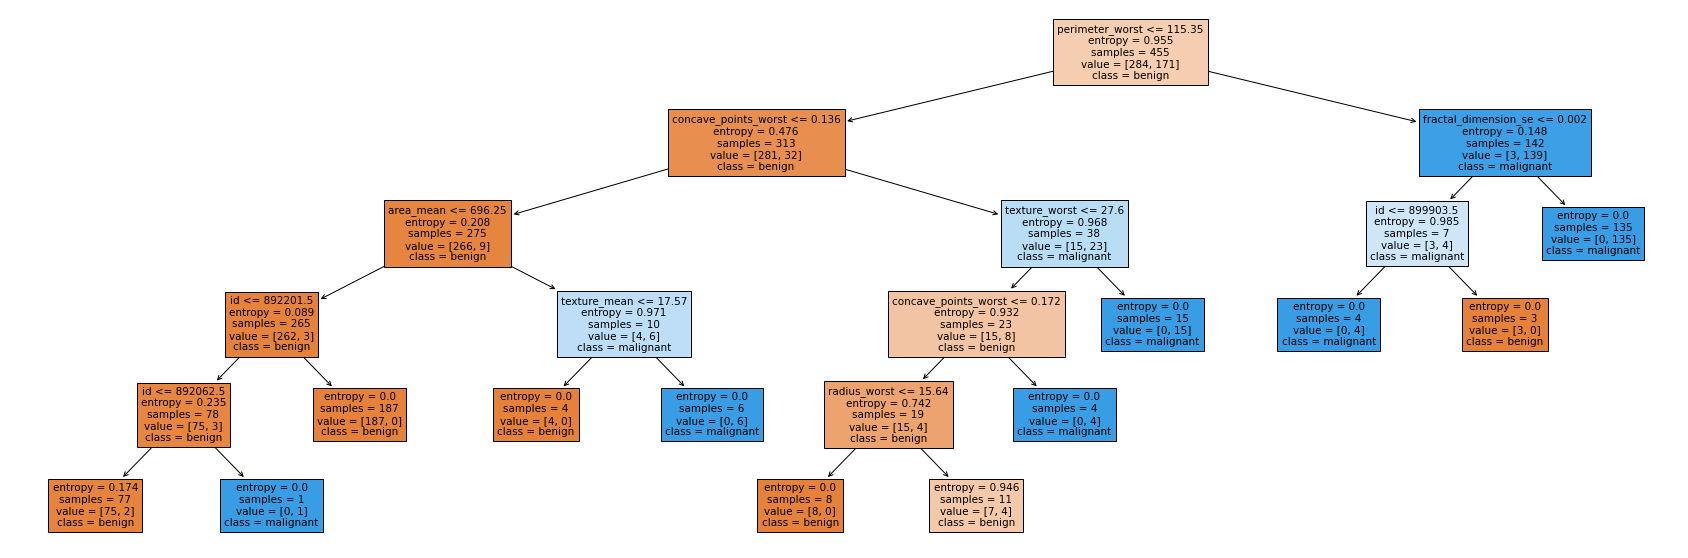

In [ ]:
plt.subplots(figsize=(30, 10))
plot_tree(clf, feature_names=X_train.columns, class_names=["benign", "malignant"], filled=True)
plt.plot()

Finally, let's see how well it works.

In [ ]:
print(classification_report(y_test, clf.predict(X_test), labels=[0, 1], target_names=["benign", "malignant"]))

              precision    recall  f1-score   support

      benign       0.96      0.97      0.97        73
   malignant       0.95      0.93      0.94        41

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Not a bad improvement!

# Further Readings Beyond the Scope of this Workshop

- Other Types of Machine Learning Methods:
    - Unsupervised Learning
    - Semi-supervised learning
    - Reinforcement Learning
- Beyond Basic Data Engineering:
    - Principle Component Analysis
- Gradient Descent and the Importance of Error Functions
- Creating a Decision Tree from Scratch:
    - ID3 Decision Tree Algorithm with a dataset of strictly binary attribute values.
- Neural Network Weight Update Rule
    - Backpropagation ( Lots of Derivates :D )